# Project on Hypothesis Testing

The expectation of the Project is to 
1. Import pandas, numpy, ttest_ind, levene, shapiro, iqr, matplotlib.pyplot
2. Get the data from excel
3. Check for Descriptive Statistics
4. Check if Shapiro and Levene test work fine for the data
5. Calculate Pooled Standard Deviation
6. Calculate Sample Power

# Problem Statement
Par Inc., is a major manufacturer of golf equipment. 

Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 

The data is given in the excel file with two attributes
    1. Current : The ball that is in the market and is currently being used 
    2. New     : The newer version of the existing ball with better cut resistance
Each Sample has 40 Observations that we taken

Following solution has a few analysis to give a recommendation for Par Inc.,

# Solution

In [6]:
# import the required packages for the analysis.
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, levene, shapiro ,iqr, mode
import matplotlib.pyplot as plt

In [7]:
#Get the data from excel using pandas package
data = pd.read_excel('SM4-Golf (2).xls')

In [8]:
#display the data to have a visual check.
#this also helps in understanding the data 
data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [9]:
#this helps to identify if there are any null values present in the data given
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [10]:
#Describe function helps us to analyse the data
#Descriptive Statistics
data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


# Inferences from Descriptive Statistics

Both the samples have the same number of Observations.

1. It is observed that the average life of the golf ball is decreased in the New Sample
2. The standard deviation is also increased in the new sample
3. Not only the mean value is decreased, but the values on all the quartile is relatively decreased

to be Continued...


In [11]:
import seaborn as sns

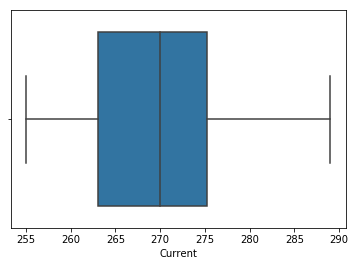

In [12]:
sns.boxplot(data['Current'])

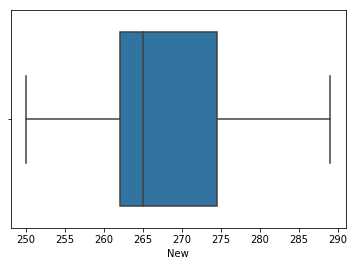

In [13]:
sns.boxplot(data['New'])

In [14]:
a = iqr(data['Current'])
b = iqr(data['New'])
print(a ,',', b)

12.25 , 12.5


C:\Users\vvisw\Anaconda3\envs\viswa\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


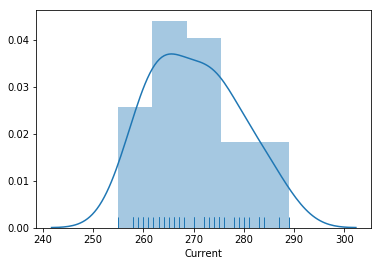

In [15]:
sns.distplot(data['Current'],rug=True)

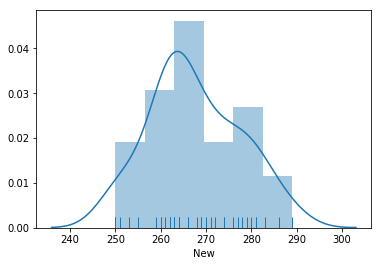

In [16]:
sns.distplot(data['New'],rug=True)

In [17]:
mode(data['Current'])

ModeResult(mode=array([263], dtype=int64), count=array([3]))

In [18]:
mode(data['New'])

ModeResult(mode=array([262], dtype=int64), count=array([4]))

# Continuation of Inferences from Descriptive Statistics

A few more Observations and Inferences from descriptive Statistics
4. It is clearly seen from box plot that there are no outliers in both the samples
5. By using the Inter-Quartile Range function it is clear that the range has increased 0.25 when compared with the Current sample
6. When both the samples are plotted to visualize the graph, it is not a perfect bell- shaped normal distribution. In both the samples, the mean and median are nearly equal but there is a significant difference in the mode value.


# Hypothesis Testing 


Since this is a parametric distribution and the samples are independent of each other we will carryout independent t-test for two or more samples.

1. Null Hypothesis (H0)    : The Average time of new Golf ball is greater than or equal to the current golf ball (mu1 >= m2)
2. Alternate Hypothesis(H1): The Average time of the new Golf ball is less than the current golf ball (mu1 < mu2)
3. Level of Significance   : Test is to be carried out at 5% Level of Significance (Assumption)

In [19]:
t_statistic, p_value = ttest_ind(data['Current'], data['New'], equal_var=False)
print(t_statistic,p_value)

1.3283615935245678 0.18798994530489838


Since the p_value is more than 0.05 we accept the null hypothesis and reject the alternate Hypothesis.

To check if the variances are equal in the samples we are going to carryout levene test

1. Null Hypothesis (H0)    : The Standard Deviation of new Golf ball is equal to the current golf ball (Sigma1 <= Sigma2)
2. Alternate Hypothesis(H1): The Standard Deviation of new Golf ball is not equal to the current golf ball (Sigma1 > Sigma2)
3. Level of Significance   : Test is to be carried out at 5% Level of Significance (Assumption)

In [20]:
levene(data['Current'],data['New']) 

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

Since the p_value is greater that 0.05 we accept the null Hypothesis and reject the alternate Hypothesis

In [21]:
statistic, pvalue = stats.shapiro(data['Current'])
print("Shapiro Statistic " + str(statistic) + " and p-value " + str(pvalue))
if pvalue > 0.05:
    print("Normal Distribution")
else:
    print("Not normal")


Shapiro Statistic 0.9707046747207642 and p-value 0.378787100315094
Normal Distribution


In [22]:
statistic, pvalue = stats.shapiro(data['New'])
print("Shapiro Statistic " + str(statistic) + " and p-value " + str(pvalue))
if pvalue > 0.05:
    print("Normal Distribution")
else:
    print("Not normal")


Shapiro Statistic 0.9678263664245605 and p-value 0.3064655363559723
Normal Distribution


Since for both the p_value for both the samples are greater than 0.05, both are Normal Distributions

# Inference from Hypothesis Testing 

Three hypothesis tests were carried out 

1. When the relationship between the samples is tested with mean as a parameter with the help of t-test for two samples, the p_value in this test is greater than 18%, which is greater than the 5% level of significance, so we accept the null hypothesis and state that the mean of the new ball is less than or equal to the mean of the current golf ball
2. When the standard deviation of the two samples are tested for a relationship using levne test, the p_value was about 61%, which is greater than 5% level of significance. So we accept the null hypothesis and reject the alternate hypothesis stating the variances of New sample are greater than or equal to the variance of the Current sample
3. The third test was to show if the samples follows a normal distribution or not. Here both follow a Normal distribution

# Calulating Pooled Standard Deviation and Sample Power

In [23]:
from statsmodels.stats.power import ttest_power

In [24]:
s_pool = np.sqrt(((40-1)*np.var(data['Current']) + (40-1)*np.var(data['New'])) / (40+40-2))
print(s_pool)

9.224949186851925


In [25]:
de = (np.mean(data['Current']) - np.mean(data['New'])) / s_pool
print(de)

0.3008146650775173


In [26]:
ttest_power(0.301,nobs=40,alpha=0.05,alternative='two-sided')

0.45896651023292995

# Inference from Pooled Standard Deviation and Sample Power
When standard deviation was calculated for Current and New samples it was 8.752985 and 9.896904 respectively. Now when pooled standard deviation is calculated it shows 9.224949 which is between both the standard deviation. This helps in calculating the Delta value, which in turn helps for calculating the power of the test.

There is a 45.9% chance rejecting the null hypothesis when it is actually false. 
Since the value is less than 50%, the chance of making a wrong decision is also high. 

# Recommendations for Par Inc., 

The following are few recommendations that I would do for Par Inc., 
1. From the hypothesis testing it can be recommended not to go for the New Golf ball as the mean is lesser than the current Golf ball and the variance of the new ball is also high when compared with the current ball.
2. The standard deviation is increasing in the new sample when compared with the current sample, which means the distribution is more widely spreading, IQR also says there is an increase of 0.25 So the chances of customer not being satisfied for increase in price for the new ball is high.